In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
# getting the data
!pip install yfinance

import yfinance as yf

start_date = '2012-01-01'
end_date = '2023-01-01'
ticker_symbol = 'AAPL'

# Fetch historical stock data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

print(df)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.482924   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.550009   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.689338   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.821994   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.801655   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674019   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
2022-12-30  128.410004  129.949997  127.430

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482924,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550009,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689338,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821994,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801655,394024400
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400


In [12]:
df.shape

(2768, 6)

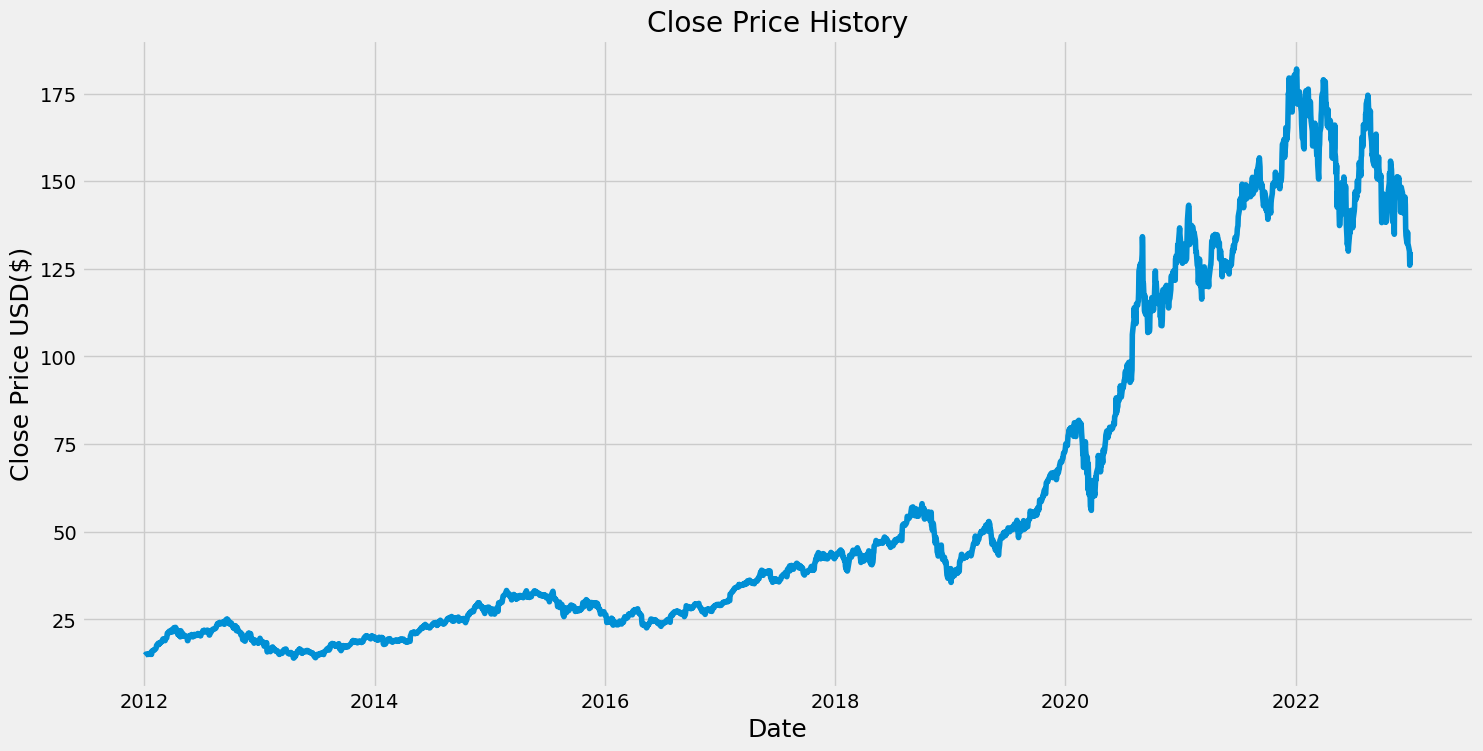

In [13]:
#closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [14]:
data=df.filter(['Close'])
#convertinf dataframe to a numpy array
dataset=data.values


training_data_len= math.ceil( len(dataset) * .8)

training_data_len

2215

In [15]:
#scaling data

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.66696916],
       [0.68821126],
       [0.69011526]])

In [16]:
#creating training data

train_data= scaled_data[0: training_data_len, :]

x_train = []
y_train = []


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [17]:
#convert x_train & y_train to numpy array

x_train,y_train= np.array(x_train), np.array(y_train)

In [19]:
x_train= np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2155, 60, 1)

In [20]:
# build model

model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
#Compile the model

model.compile(optimizer='adam', loss = 'mean_squared_error')

In [22]:
#training model

model.fit(x_train, y_train, batch_size = 1, epochs= 1)

2155/2155 [==============================] - 92s 40ms/step - loss: 6.3385e-04


In [24]:
#creating test data

test_data = scaled_data[training_data_len - 60: , :]

x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [25]:
#converting data to a numpy array
x_test=np.array(x_test)

In [26]:
#reshaping

x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [28]:
x_test.shape

(553, 60, 1)

In [29]:
#models predicted price values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 3s 25ms/step


In [30]:
#model evaluation RMSE

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.309358900363533

<ipython-input-31-6a731b0b2daa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


<function matplotlib.pyplot.show(close=None, block=None)>

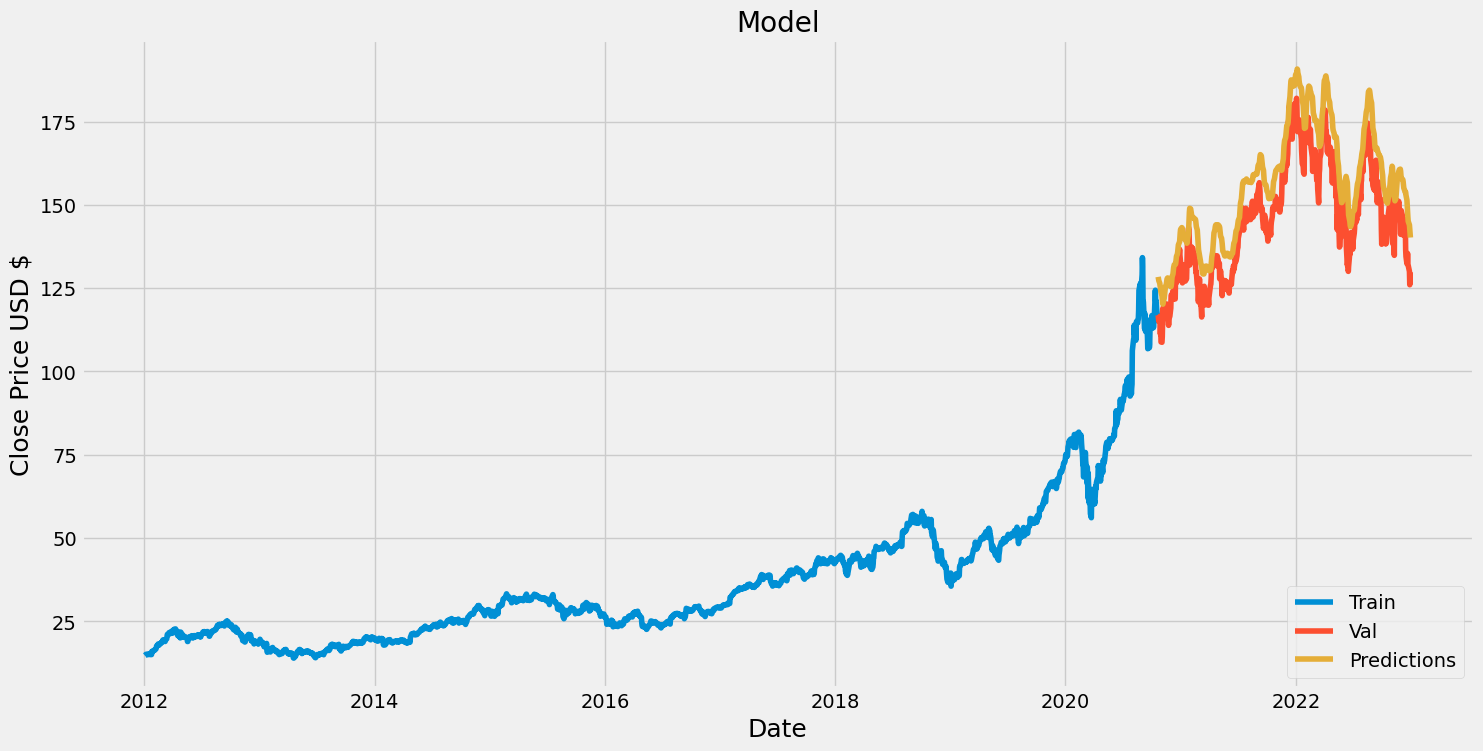

In [31]:
#plot the data

train= data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show

In [32]:
#show the actual vs predicted price

valid

,Close,Predictions
Date,,
2020-10-21,116.870003,128.399841
2020-10-22,115.750000,127.911934
2020-10-23,115.040001,127.257652
2020-10-26,115.050003,126.495552
2020-10-27,116.599998,125.753708
...,...,...
2022-12-23,131.860001,145.112045
2022-12-27,130.029999,143.965622
2022-12-28,126.040001,142.805527


In [33]:
start_date = '2012-01-01'
end_date = '2023-01-01'
ticker_symbol = 'AAPL'

# Fetch historical stock data
dd = yf.download(ticker_symbol, start=start_date, end=end_date)

new_df = dd.filter(['Close'])

last_60_days=new_df[-60:].values

#scaling

last_60_days_scaled= scaler.transform(last_60_days)
#create an empty list
X_test=[]
# append past 60 days
X_test.append(last_60_days_scaled)

#convert in numpy array
X_test= np.array(X_test)
#reshaping
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#predicted scaled price
pred_price= model.predict(X_test)
#undo the scaling
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 64ms/step
[[139.49461]]


In [42]:
import yfinance as yf

# Ticker symbol
ticker_symbol = 'AAPL'

# Define the date range for historical data
start_date = '2023-01-01'
end_date = '2023-01-31'

# Fetch historical stock data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the dates when the stock price was trading
trading_dates = data.index.strftime('%Y-%m-%d')
print("Trading Dates:")
print(trading_dates)


[*********************100%***********************]  1 of 1 completed
Trading Dates:
Index(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09',
       '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-17',
       '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24',
       '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-30'],
      dtype='object', name='Date')


In [49]:
import yfinance as yf

# Ticker symbol
ticker_symbol = 'AAPL'

# Define the date range for historical data
start_date = '2023-01-01'
end_date = '2023-01-11'

# Fetch historical stock data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the closing price values for trading dates
trading_dates = data.index.strftime('%Y-%m-%d')
for date in trading_dates:
    close_price = data.loc[date, 'Close']
    print(f"Date: {date}, Close Price: {close_price}")


[*********************100%***********************]  1 of 1 completed
Date: 2023-01-03, Close Price: 125.06999969482422
Date: 2023-01-04, Close Price: 126.36000061035156
Date: 2023-01-05, Close Price: 125.0199966430664
Date: 2023-01-06, Close Price: 129.6199951171875
Date: 2023-01-09, Close Price: 130.14999389648438
Date: 2023-01-10, Close Price: 130.72999572753906
